<a href="https://colab.research.google.com/github/mkaanmolla/Sentiment_Analysis_on_IMDB_Movie_Reviews/blob/main/SentimentAnalysisIMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
With the introduction of machine learning and artificial intelligence into our daily lives, algorithms belonging to these branches have started to be used in many areas. Machine learning, which is used in many areas such as image recognition, cyber security, sentiment analysis, stock market signals, product recommendations, social media, health, daily life, has gained popularity day by day.

Sentiment analysis, which is the subject of this project from related fields, is the process of detecting positive or negative emotion in the text. It is often used by businesses to detect sentiment in social data, measure brand reputation, and understand customers. As customers have recently expressed their thoughts and feelings more openly than ever before, sentiment analysis has become an essential tool for tracking and understanding this sentiment.

#IMDB Large Movie Reviews Dataset
There are 50,000 user comments from IMDB in this data set, which was selected for this project. The dataset is classified as positive and negative and also contains additional unlabeled data that can be used for training and testing purposes. The dataset is labeled “Large Movie Review Dataset” and can be downloaded from the Kaggle or Stanford website. The data set is downloaded in a compressed form and contains 2 folders called test and train. These two folders contain 2 more folders, neg and pos. Within each folder, the comments are in text form one by one. This will bring the necessity of merging while reading the data set from the idea to be used.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import nltk
from glob import glob
import numpy as np
import os,re,string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import spacy

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
#Reading data from link
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!gunzip aclImdb_v1.tar.gz
!tar -xvf aclImdb_v1.tar

In [ ]:
PATH='/content/aclImdb/'
names = ['neg','pos']
!ls {PATH}
!ls {PATH}train
!ls {PATH}train/pos | head

#Similar for the test folder
!ls {PATH}test
!ls {PATH}test/pos | head

imdbEr.txt  imdb.vocab	README	test  train
labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt
0_9.txt
10000_8.txt
10001_10.txt
10002_7.txt
10003_8.txt
10004_8.txt
10005_7.txt
10006_7.txt
10007_7.txt
10008_7.txt
labeledBow.feat  neg  pos  urls_neg.txt  urls_pos.txt
0_10.txt
10000_7.txt
10001_9.txt
10002_8.txt
10003_8.txt
10004_9.txt
10005_8.txt
10006_7.txt
10007_10.txt
10008_8.txt


In [ ]:
#Loading Labels from folder
#Train/test split
def load_texts_labels_from_folders(path, folders):
    texts,labels = [],[]
    for idx,label in enumerate(folders):
        for fname in glob(os.path.join(path, label, '*.*')):
            texts.append(open(fname, 'r').read())
            labels.append(idx)
    # stored as np.int8 to save space 
    return texts, np.array(labels).astype(np.int8)

trn,trn_y = load_texts_labels_from_folders(f'{PATH}train',names)
val,val_y = load_texts_labels_from_folders(f'{PATH}test',names)

len(val),len(trn_y),len(val),len(val_y)

len(trn_y[trn_y==1]),len(val_y[val_y==1])

np.unique(trn_y);

In [ ]:
#Label Check
print(trn[24001])
print()
print(f"Review's label: {trn_y[24001]}")
# 0 represent a negative review

One of the few best films of all time. The change from Black and white to colour for the Heaven and Earth Sequences was Directorial excellence.<br /><br />The Plot is extremely clever, the complete film leaves you overwhelmed by all of the human emotions, and although a war film it doesn't discriminate. I must have seen this film more times than any other, and I never tire of it. It is a film that makes you question your own mortality and beliefs on what happens after our demise.

Review's label: 1


In [ ]:
#Dataframe creation with using trn,val ve valy,trny
d = {"Comment": trn, "Sentiment": trn_y}
df=pd.DataFrame(d)
d1={"Comment":val,"Sentiment":val_y}
df1=pd.DataFrame(d1)

df=pd.concat([df,df1])
df.head()

,Comment,Sentiment
0,"The idea of In the Name of the People is good,...",0
1,I always wrote this series off as being a comp...,0
2,SPOILER WARNING: There are some minor spoilers...,0
3,Is this film a joke? Is it a comedy? Surely it...,0
4,This is the kind of film that everyone involve...,0


#Preprocessing
On the dataset, some corrections, completing missing data, removing duplicate data,transform, integrate, clean, normalize, size reduction, etc.
operations are called preprocessing. It is essential to perform this process in order to understand the data and obtain more positive results.

In [ ]:
#preprocessing

#Making Lowercase
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Removing punctuations
df['Comment'] = df['Comment'].str.replace('[^\w\s]','')

In [ ]:
#Removing emojis
# REFERENCE : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Comment'] = df['Comment'].apply(lambda x: remove_emoji(x))

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Stopwords
Stop Words are words that are ignored in order to show the user the result faster as a result of queries on search engines. Since these words do not affect the ranking in the results of the search queries, they should also be removed from the data set, as they will not affect the algorithms used.

In [ ]:
#Removing Stopwords
stop = stopwords.words('english')
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,Comment,Sentiment
0,idea name people good murderer doesnt want dau...,0
1,always wrote series complete stinkfest jim bel...,0
2,spoiler warning minor spoilers review dont rea...,0
3,film joke comedy surely isnt serious thriller ...,0
4,kind film everyone involved embarrassed poor d...,0


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Stemming
It is the process of eliminating the words derived from the same word in the text separately and reducing them to a single word. Of course, this process creates many differences from language to language. The morphology of the language changes the methods used in the algorithms to be developed. Morphologic analysis and generation, NGram methods are used in the infrastructure. In the code below, a function called "stemSentence" is created using the "nltk" library. This function aims to take the roots of each sentence by separating it into words and turn it into a sentence again. Although it does not give as healthy results as the "Lemmatization" algorithm mentioned below, the algorithm's short working time is attractive.

In [ ]:
#Stemming
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
df['Comment']=df['Comment'].apply(stemSentence)
df.head(20)

,Comment,Sentiment
0,idea name peopl good murder doesnt want daught...,0
1,alway wrote seri complet stinkfest jim belushi...,0
2,spoiler warn minor spoiler review dont read be...,0
3,film joke comedi sure isnt seriou thriller sug...,0
4,kind film everyon involv embarrass poor direct...,0
5,disappoint movi thought scari movi although gr...,0
6,ill keep short know dont need say muchbr br al...,0
7,startoh yea messag bad guy first find person t...,0
8,comment show movi might scare your littl child...,0
9,sinc caligula consid turn movi halfway through...,0


In [ ]:
#Lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['Comment']= df['Comment'].apply(space)

In [ ]:
df.head(20)

,Comment,Sentiment
0,idea name peopl good murder do not want daught...,0
1,alway write seri complet stinkfest jim belushi...,0
2,spoiler warn minor spoiler review do not read ...,0
3,film joke comedi sure be not seriou thriller s...,0
4,kind film everyon involv embarrass poor direct...,0
5,disappoint movi think scari movi although grea...,0
6,ill keep short know do not need say muchbr br ...,0
7,startoh yea messag bad guy first find person t...,0
8,comment show movi may scare -PRON- littl child...,0
9,sinc caligula consid turn movi halfway through...,0


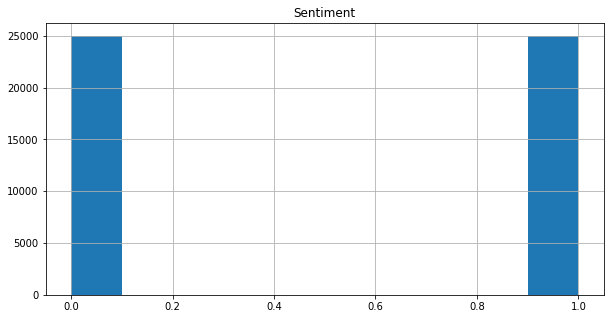

In [ ]:
#Check distribution of positives and negatives
import seaborn as sns 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [ ]:
#Vectorizing dataset
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(df['Comment']).toarray()

In [ ]:
X.shape


(50000, 1000)

In [ ]:
X[0].mean()
y = df.iloc[:,-1].values
y.shape

(50000,)

In [ ]:
#Train, test split 80% Train 20%Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 1000), (10000, 1000), (40000,), (10000,))

#Gaussian Naive Bayes Classifier
If the features are continuous values, it is assumed that these values ​​are sampled from a gaussian distribution, or in other words, from a normal distribution.
The code of the Gaussian Naive Bayes algorithm used in the project is given below and the measurement was made with a sensitivity of 79.33%. A total of 10000 predictions were made, of which 4148 are true negative and 3785 true positive values.
#Multinominal Naive Bayes Classifier
It is mostly used to classify e-commerce multi-class categories—sports, cosmetics, apparel, petshop. The code of the Multinominal Naive Bayes algorithm used in the project is given below and the measurement was made with a precision of 82.31%. A total of 10000 predictions were made, of which 4102 are true negative and 4129 are true positive values.
#Bernoulli Naive Bayes Classifier
It makes classification similar to Multinominal Naive Bayes. However, the predictions are only in boolean (binary) form. Ideal for Yes/No, Spam/Not Spam, 1/0, Yes/No etc predictions. The code of the Bernoulli Naive Bayes algorithm used in the project is given below and the measurement was made with a precision of 82.29%. A total of 10000 predictions were made, of which 3982 were true negative and 4247 were true positive values.

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# Craeting object
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred1 =clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_test.shape, y_pred1.shape

((10000,), (10000,))

Gaussian:  0.7933


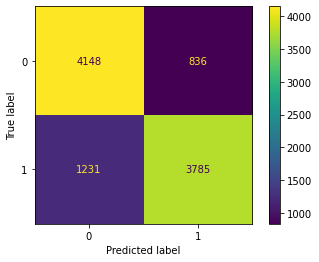

In [ ]:
#Confusion Matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print('Gaussian: ', accuracy_score(y_test, y_pred1))
cm=confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf1.classes_)
disp.plot(values_format='d');

Multinomial:  0.8231


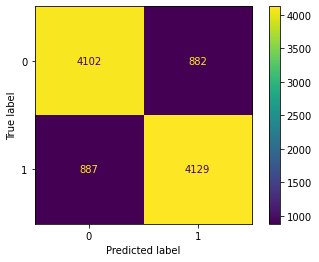

In [ ]:
#Confusion Matrix
print('Multinomial: ', accuracy_score(y_test, y_pred2))
cm=confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf2.classes_)
disp.plot(values_format='d');


Bernoulli:  0.8229


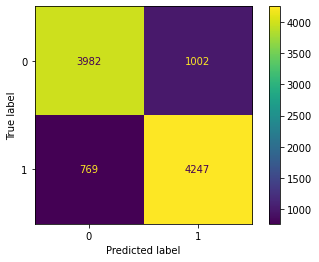

In [ ]:
#Confusion Matrix
print('Bernoulli: ', accuracy_score(y_test, y_pred3))
cm=confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf3.classes_)
disp.plot(values_format='d');

#Results
Within the scope of this project, it is aimed to conduct a Sentiment Analysis study. Studies have been carried out on the "Large Movie Review Dataset" prepared by Stanford University. The data set is made ready to be subjected to machine learning algorithms by performing operations such as downloading and reading the data set, checking the accuracy of the data, creating a dataframe with the obtained data, cleaning the data and necessary pre-processes, and dividing the data set. Naive Bayes Algorithms, one of the most frequently used algorithms, were preferred as machine learning algorithms. As a result of these algorithms, estimation processes were made and the following sensitivity results were obtained: </br></br>
• Gaussian Naive Bayes Algorithm: 79.33% </br>
• Multinominal Naive Bayes Algorithm: 82.31% </br>
• Bernoulli Naive Bayes Algorithm: 82.29% </br></br>
Considering these results, the most sensitive and accurate algorithm was the "Multinominal Naive Bayes Algorithm". However, the "Bernoulli Naive Bayes Algorithm" can be preferred in order to make these estimations, both with its ability to only perform boolean classification and the 4247 True Positive results it obtained. In order to make this choice even clearer, it may be preferable to use a data set with more data. If it is desired to obtain more precise results, the codes of the "Lemmatization" and "Stemming" algorithms can be developed and libraries with better results can be written.